#### 타이타닉 생존율을 위한 데이터 분석 - EDA기반 데이터 분석
- 데이터 분석 과정
1. 데이터 분석 설계
    - 방향성 기획
    - 방법론 검토
    - 가설 설정
2. 데이터 준비
    - 데이터 불러오기
    - 형태 파악하기
3. 데이터 가공
    - 추출 및 정제
    - 파생 변수 생성
    - 데이터 병합
4. 데이터 분석
    - 통계 분석
    - 그래프 및 시각화
5. 결론 도출
    - 분석 결과 해석
    - 분석 결과 정리

- 타이타닉 데이터 
    - train.csv -> 훈련데이터
    - test.csv -> 테스트 데이터
    - submission.csv : 훈련데이터로 학습 시켜서 테스트 데이터 적용해서 생존율을 예측한 결과를 파일로 생성함.
    
- EDA는 데이터를 시각화 하고 요약 통계를 통해 데이터 구조, 이상치, 패턴 등을 발견하는 과정이다.
- EDA 주요 목적
    - 데이터 이해
    - 이상치 발견
    - 가설 설정
    - 데이터 변환
- EDA의 주요 기법
    - 기술 통계 : 평균, 중앙값, 분산, 표준편차 등 기본 통계량을 계산하여 데이터 특성을 파악함.
    - 데이터 시각화 -  matplotlib, seaborn
    - 상관분석 - 변수 간의 상관관계를 분석하여 변수 간의 관계를 파악
    - 히트맵(Heatmap) - 상관관계를 시각적으로 표현

- 머신 러닝

In [1]:
# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 한글 폰트 관련
from matplotlib import rc

path = "../data0225/malgun.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc("font", family="Malgun Gothic")

Matplotilb
- 세밀한 그래프 그리기 작성 가능

In [3]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

데이터 수집
- 훈련 데이터 - 모형 - train.csv
- 테스트 데이터 - 답안지 - test.csv

In [4]:
#훈련 데이터 - 모형 - train.csv
df_train = pd.read_csv("../data0225/titanic0225/train0225.csv")

In [5]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

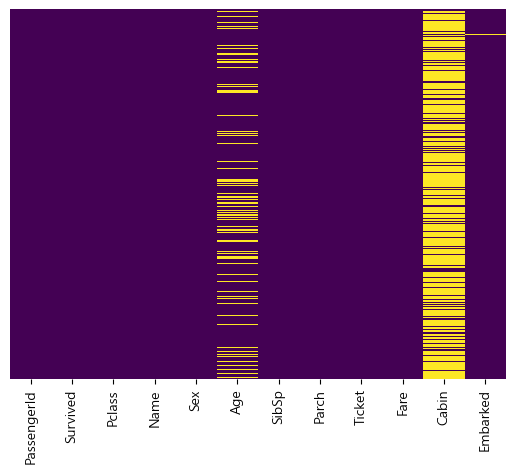

In [11]:
# 결측치를 seaborn활용하여 시각화 하기
# 결측치가 있으면 True, 없으면 False
# yticklabels - False이면 레이블을 표시하지 않습니다.
# cbar - False이므로 색상 막대는 표시되지 않습니다.
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [12]:
#테스트 데이터 - 답안지 - test.csv
df_test = pd.read_csv("../data0225/titanic0225/test0225.csv")

In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### 2-1. Target 변수(Survived)

In [15]:
#어떤 컬럼이 있는지
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df_train["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

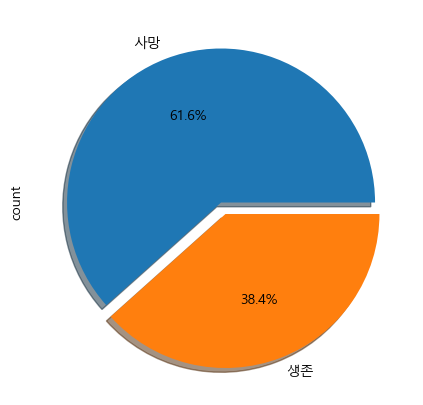

In [18]:
#그림의 크기를 가로 8인치, 세로 5인치로 설정
plt.figure(figsize=(8,5))
labels = ["사망", "생존"] #파이 차트 붙일 레이블을 리스트로 정의
# 0이면 사망, 1이면 생존
# type(df_train["Survived"]) - Series -> index, value 
# value_counts() : 열 중에서 각 0 또는 1이 몇번 반복되었나를 카운트 한다.
#  explode => 사망은 그대로 보여주고 두번째 조각인 생존은 원에서 0,08만큼 떨어지게 설정한다.
# autopct => 조각에 해당하는 비율을 소수점 1자리까지 표시함. 두번째 자리에서 반올림
df_train["Survived"].value_counts().plot.pie(explode=[0,0.08], shadow=True, autopct="%1.1f%%", labels=labels)

#### 2-2. 성별(남성: male, 여성: female)
- 문자열인지 수치형 구분
- 탑승자 중에서 남성이 얼마인가? 또 여성이 얼마인지?
- 남성 탑승자 수가 더 많지만  여성의 생존자 수가 더 많다. 가설
- 문제 :  성별 탑승자 수, 성별 생존자 수를 시각화 하시오.
	- plt.subplots(1, 2, figsize=(12,5)) : 1행에 두 열을 그리기
	- 범례(legend) 설정: axes[1].legend(labels = ["사망", "생존"])
	- 제목 설정 : axes[1].set_title("성별 생존자 수 \n", size= 15): size글자 크기

그래프 그리는 순서
1. 서브플롯 생성     
2. 제목 설정(각 두 번)     
3. 그리기(각 두 번)     
4. 범례    

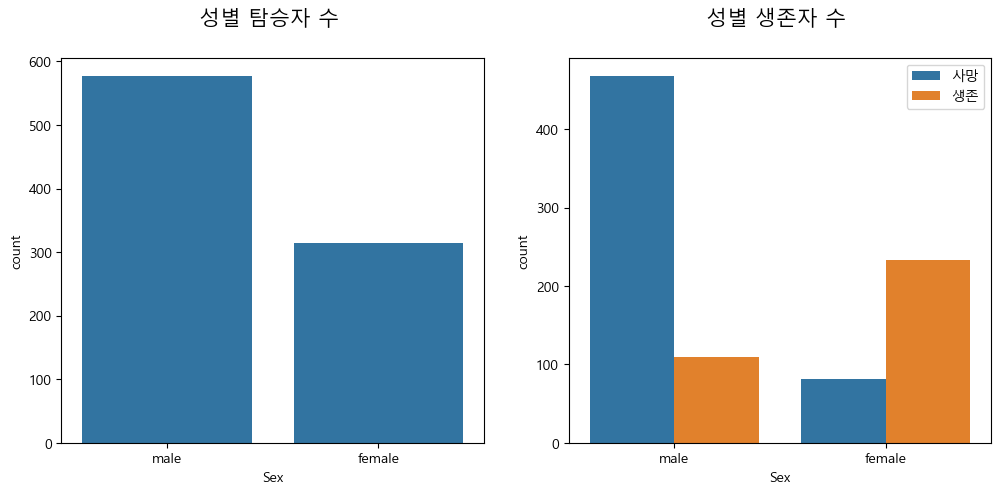

In [19]:
# fig는 전체 그림 객체, axes는 각 서브프롯을 나타내는 축 배열 이다.
fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].set_title("성별 탐승자 수 \n", size= 15)

# 첫번째 서브플롯에는 : 성별 탐승자 수
sns.countplot(x="Sex", data=df_train, ax=axes[0])
axes[1].set_title("성별 생존자 수 \n", size= 15)

# 두번째 서브플롯에는 : 성별 생존자 수
sns.countplot(x="Sex",hue="Survived", data=df_train, ax=axes[1])
axes[1].legend(labels=["사망","생존"])

#### 2-3. 티켓 클래스(Pclass)
- 티켓 클래스별로 어떤 생존율을 보이고 있는가?
- 데이터 프레임에서 티켓 클래스 별로  생존율이 몇 %인가?
- 클래스별 탑승자 수, 클래스별 생존/사망자 수
- 1등석의 생존율 : 약 63%
- 2등석의 생존율 : 약 42.3%
- 3등석의 생존율 : 약 24.2%

In [20]:
df_train[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


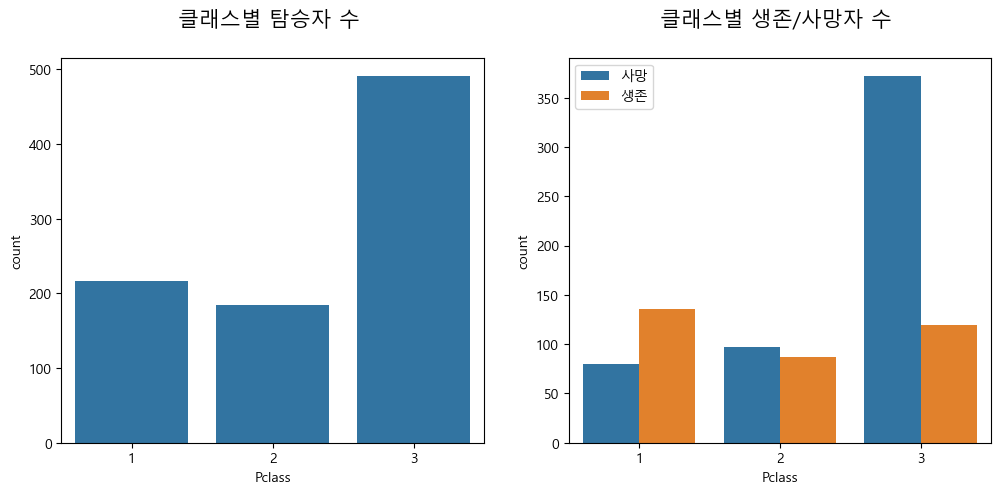

In [21]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].set_title("클래스별 탐승자 수 \n", size= 15)

# 첫번째 서브플롯에는 : 클래스별 탐승자 수
sns.countplot(x="Pclass", data=df_train, ax=axes[0])
axes[1].set_title("클래스별 생존/사망자 수 \n", size= 15)

# 두번째 서브플롯에는 : 클래스별 생존자 수
sns.countplot(x="Pclass",hue="Survived", data=df_train, ax=axes[1])
axes[1].legend(labels=["사망","생존"])

3등석의 사람들이 많이 사망하였다.      
혹시 3등석의 위치가 배 아래 쪽에 깊이 위치하고 있지 않나?     
3등석은 외부로 탈출하는 동선이 길지 않나?   

데이터에 대한 전처리 여부에 따라 분석 결과가 달라질 수 있다.    
전처리가 반드시 필요한가?     
결측치의 존재 여부가 데이터 분석에 영향을 준다.     
결측치가 있는 속성인가?
결측치가 얼마나 되는지에 따라서.....

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2-4. 나이(Age)
- 결측치가 존재하는지 여부     
- 결측치가 존재할 경우 어떻게 빈칸을 채울것인가?
- 탑승객들의 평균 나이는 얼마인가? 확인한 후에 결측치에 처리 방법에 대해 결정을 한다.
- 탑승객들의 평균 나이는 30세 입니다.    

In [23]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_8064\850423297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["Age"], bins=25)


<Axes: xlabel='Age', ylabel='Density'>

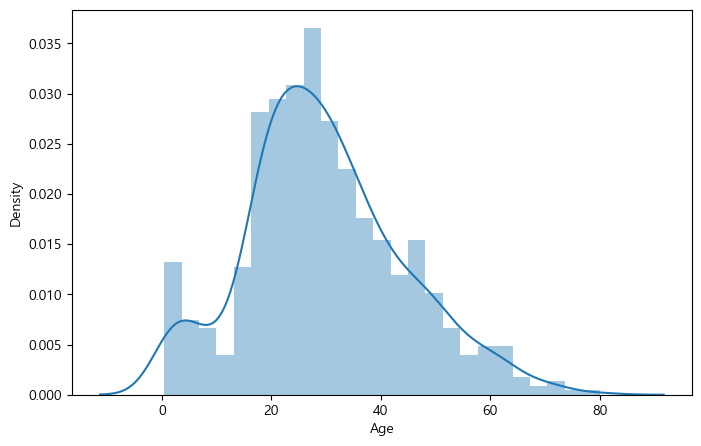

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(df_train["Age"], bins=25)

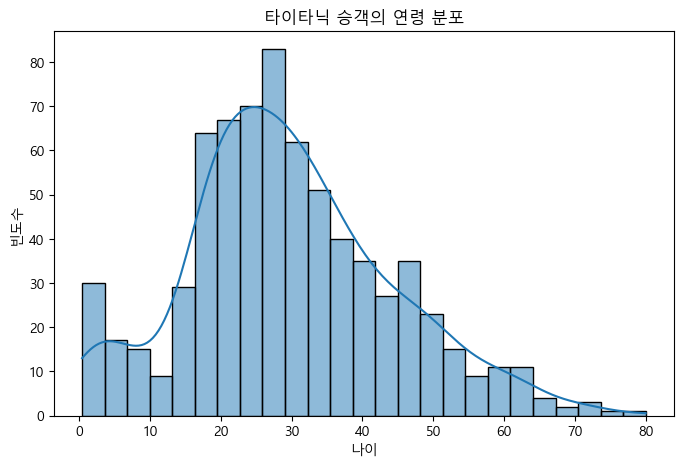

In [25]:
plt.figure(figsize=(8,5))
# kde=True이면 KDE곡선 추가해준다.
# KDE(Kerneal Density Estimation, 커널 밀도 추정)은 주어진 데이터 샘플을 기반으로 
# 확률 밀도 함수를 추정하는 방법이다.
# 정규분포를 따르지 않고 데이터 자체로 부터 분포 형태 추정하여 처리한다.
# df_train["Age"]는 타이타닉 승객의 연령 데이터를 담은 Series 입니다.
# bins=25는 데이터 범위를 25개의 구간으로 나눠 각 구간에 해당하는 데이터의 빈도를 표시합니다.    
sns.histplot(df_train["Age"], bins=25, kde=True)
plt.xlabel("나이")
plt.ylabel("빈도수")
plt.title("타이타닉 승객의 연령 분포")
plt.show()

#### 2-5. 함께 탑승한 가족의 수(SipSp, Parch)
- SipSp : 함께 탑승한 형제자매, 배우자 수 총합
- Parch : 함께 탑승한 부모, 자녀 수 종합

In [26]:
df_train[["SibSp", "Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


C:\Users\KOSMO\AppData\Local\Temp\ipykernel_8064\3017723724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SibSp", data=df_train, ax=axes[0][0], palette="Set2")
C:\Users\KOSMO\AppData\Local\Temp\ipykernel_8064\3017723724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Parch", data=df_train, ax=axes[0][1], palette="Set2")


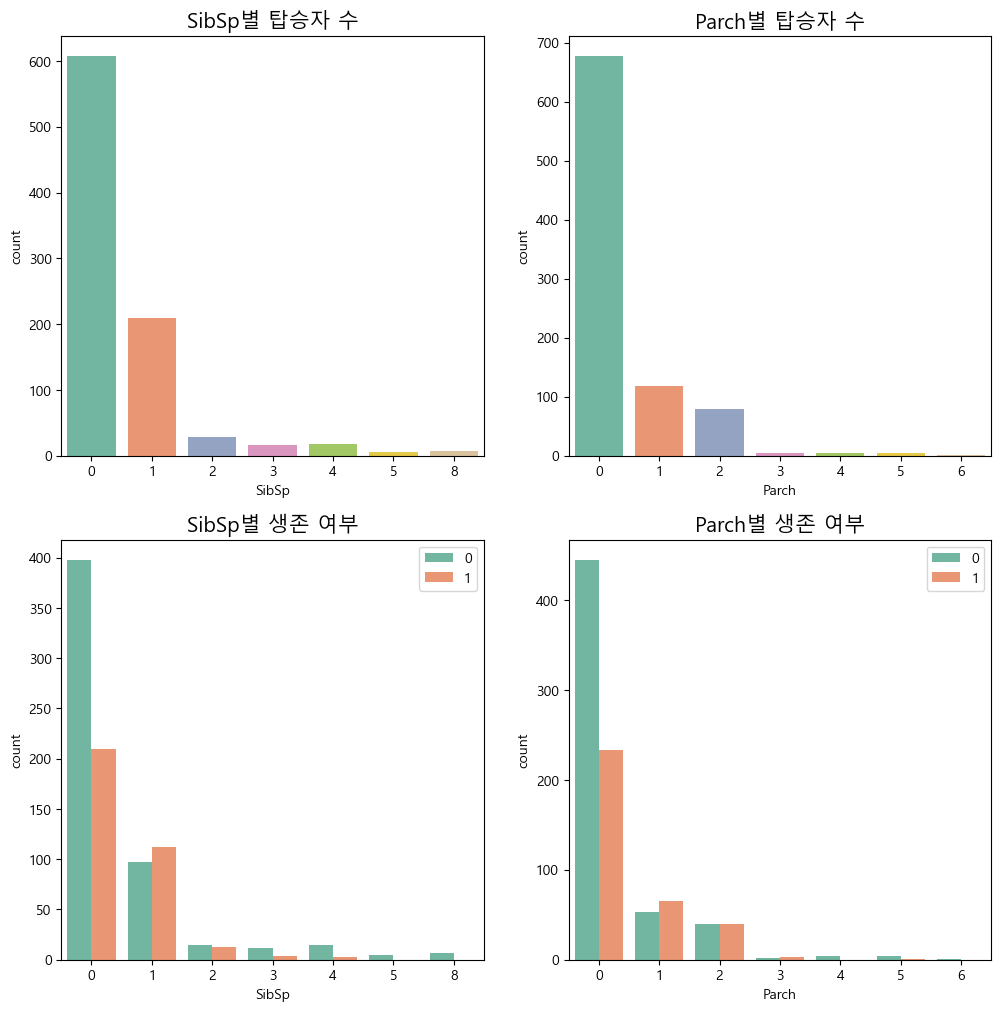

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("SibSp별 탑승자 수", size=15)
sns.countplot(x="SibSp", data=df_train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("Parch별 탑승자 수", size=15)
sns.countplot(x="Parch", data=df_train, ax=axes[0][1], palette="Set2")

axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=df_train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=df_train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

#### 2-6. 탑승 항구(Embarked)
- S항구 탑승객이 가장 많았으며 사망한 인원 역시 S항구 탑승객이 가장 많습니다.

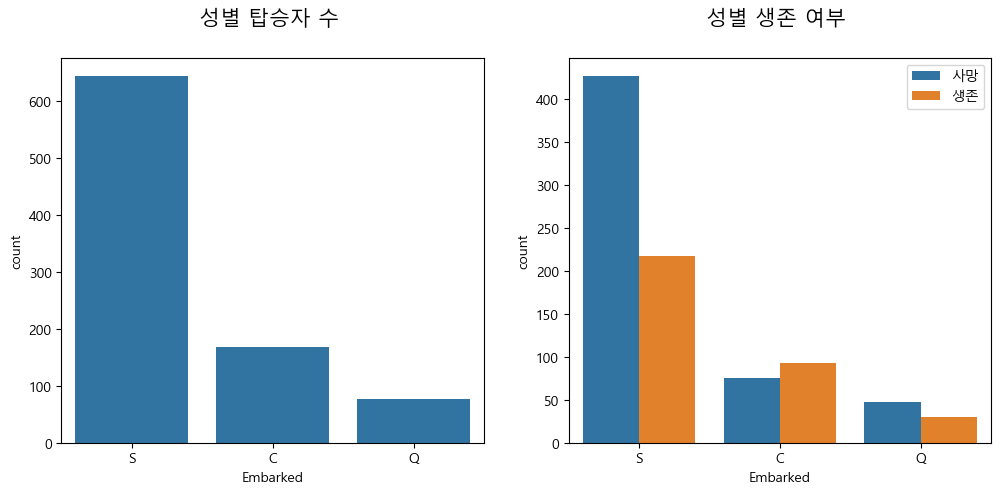

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=df_train, ax=axes[0])

axes[1].set_title("성별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=df_train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

In [29]:
df_train[["Embarked", "Survived"]]

,Embarked,Survived
0,S,0
1,C,1
2,S,1
3,S,1
4,S,0
...,...,...
886,S,0
887,S,1
888,S,0
889,C,1


In [30]:
df_train[["Embarked", "Survived"]].groupby(["Embarked"]).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: >

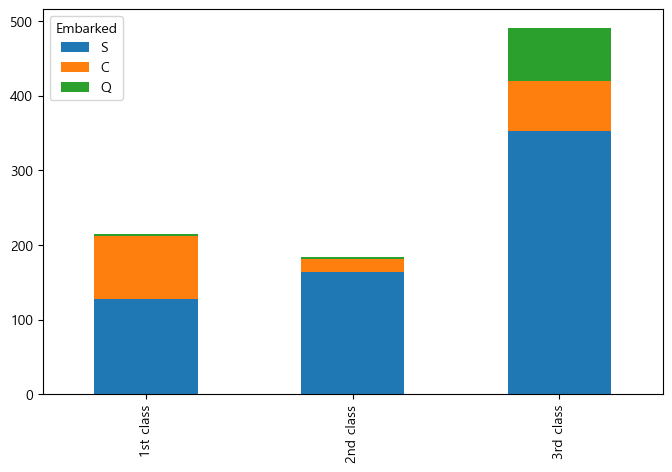

In [31]:
pc1 =  df_train[df_train["Pclass"] == 1]["Embarked"].value_counts()
pc2 =  df_train[df_train["Pclass"] == 2]["Embarked"].value_counts()
pc3 =  df_train[df_train["Pclass"] == 3]["Embarked"].value_counts()

pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ["1st class", "2nd class", "3rd class"]
fig,  ax = plt.subplots(figsize=(8,5))
pc.plot(kind="bar", stacked=True, ax =ax)

#### 2-7. 탑승금액(Fare)
- 탑승금액에 따라 사망율 영향이 있을까?

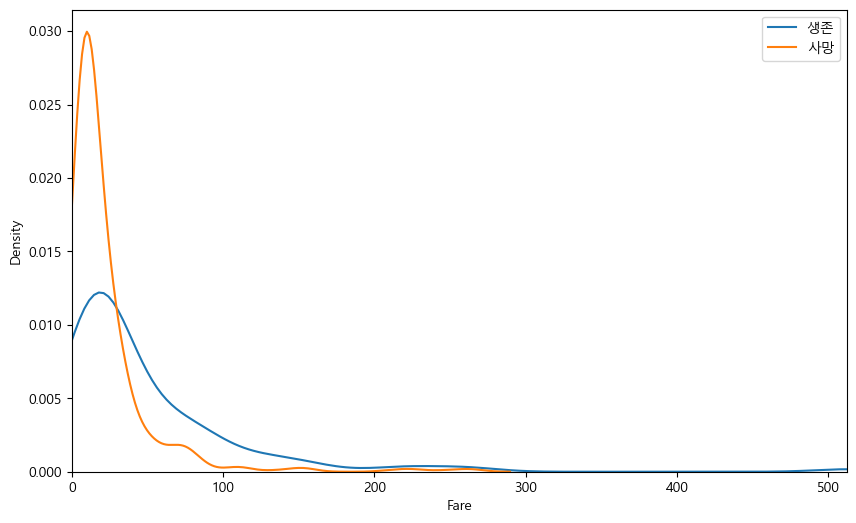

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

# 분포 확인
sns.kdeplot(df_train[df_train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Fare'], ax=ax)

# 축 범위
ax.set(xlim=(0, df_train['Fare'].max()))
ax.legend(['생존', '사망'])

plt.show()

#### 2-8. 배정 받은 선실 정보(Cabin)
- 승객이 배정받은 선실 정보를 담고 있다.
- C85 : C데크의 85번 객실
- 객실의 위치와 구명 보트 상관관계
- 결측치 많음 : 배정이 없었던 승객이 많았다???
- 또는 누락되었다.
- 범주형 속성이다.

In [33]:
list(df_train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']